In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
pd.set_option('display.max_colwidth', None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quran-vs-bible/all-MiniLM-L12-v2_similarities_between_quran_and_torah.csv
/kaggle/input/quran-vs-bible/msmarco_similarities_between_quran_and_torah.csv
/kaggle/input/quran-vs-bible/google_USE_similarities_between_quran_and_torah.csv
/kaggle/input/quran-vs-bible/MiniLM_L6_similarities_between_quran_and_torah.csv
/kaggle/input/quran-vs-bible/mpnet_v2_similarities_between_quran_and_torah.csv


in this notebook we will be using this dataset [Quran vs Torah](https://www.kaggle.com/datasets/mobassir/quran-vs-bible)

we will use these 5 datasets,

1. all-MiniLM-L12-v2_similarities_between_quran_and_torah.csv

2. msmarco_similarities_between_quran_and_torah.csv

3. google_USE_similarities_between_quran_and_torah.csv

4. MiniLM_L6_similarities_between_quran_and_torah.csv

5. mpnet_v2_similarities_between_quran_and_torah.csv

the idea of this notebook is similar to ensemble approach. we pick the verses pairs from each dataframe with highest confident score (we take the decision based on histogram score distribution), then we merge all the filtered dataset and drop duplicates except first. then we sort the final filtered dataset and save that dataset for next level research.

In [2]:
minilml12 = pd.read_csv('/kaggle/input/quran-vs-bible/all-MiniLM-L12-v2_similarities_between_quran_and_torah.csv')
msmarco = pd.read_csv('/kaggle/input/quran-vs-bible/msmarco_similarities_between_quran_and_torah.csv')
use = pd.read_csv('/kaggle/input/quran-vs-bible/google_USE_similarities_between_quran_and_torah.csv')
minilml6 = pd.read_csv('/kaggle/input/quran-vs-bible/MiniLM_L6_similarities_between_quran_and_torah.csv')
mpnetv2 = pd.read_csv('/kaggle/input/quran-vs-bible/mpnet_v2_similarities_between_quran_and_torah.csv')

In [3]:
minilml12['similarity_score'] = minilml12['similarity_score'] * 100
minilml12['similarity_score'] =minilml12['similarity_score'].astype(int)
msmarco['similarity_score'] = msmarco['similarity_score'] * 100
msmarco['similarity_score'] =msmarco['similarity_score'].astype(int)
use['similarity_score'] = use['similarity_score'] * 100
use['similarity_score'] =use['similarity_score'].astype(int)
minilml6['similarity_score'] = minilml6['similarity_score'] * 100
minilml6['similarity_score'] =minilml6['similarity_score'].astype(int)
mpnetv2['similarity_score'] = mpnetv2['similarity_score'] * 100
mpnetv2['similarity_score'] =mpnetv2['similarity_score'].astype(int)

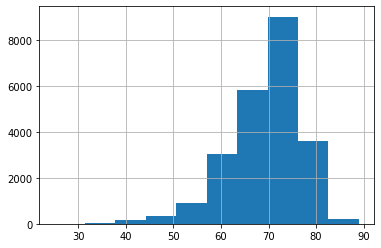

In [4]:
minilml12['similarity_score'].hist()

top_minilml12 = minilml12[minilml12['similarity_score']>75]

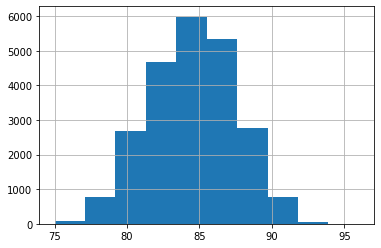

In [5]:
msmarco['similarity_score'].hist()

top_msmarco = msmarco[msmarco['similarity_score']>88]

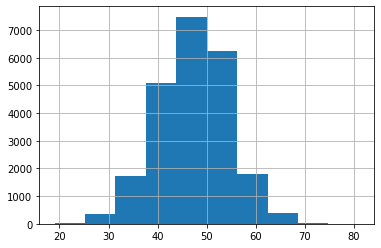

In [6]:
use['similarity_score'].hist()

top_use = use[use['similarity_score']>60]

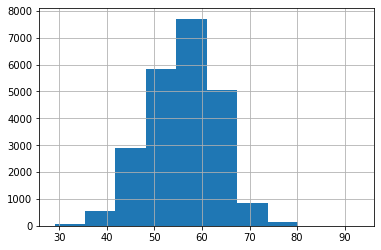

In [7]:
minilml6['similarity_score'].hist()

top_minilml6 = minilml6[minilml6['similarity_score']>70]

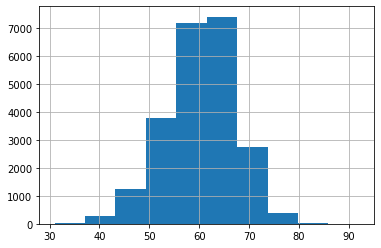

In [8]:
mpnetv2['similarity_score'].hist()

top_mpnetv2 = mpnetv2[mpnetv2['similarity_score']>70]

In [9]:
top_minilml12 = top_minilml12.reset_index(drop=True)
top_msmarco = top_msmarco.reset_index(drop=True)
top_use = top_use.reset_index(drop=True)
top_minilml6 = top_minilml6.reset_index(drop=True)
top_mpnetv2 = top_mpnetv2.reset_index(drop=True)

In [10]:
len(top_minilml12), len(top_msmarco), len(top_use), len(top_minilml6), len(top_mpnetv2)

(4950, 1845, 758, 371, 1217)

In [11]:
merged_df = pd.concat([top_minilml12,top_msmarco,top_use,top_minilml6,top_mpnetv2],ignore_index=True)
merged_df = merged_df.reset_index(drop=True)

In [12]:
len(merged_df)

9141

In [13]:
merged_df = merged_df.drop_duplicates( keep='first')


In [14]:
merged_df.head(2)

,t_citation,t_book,t_chapter,t_verse,t_text,q_Name,q_Surah,q_Ayat,q_Verse,similarity_score
0,Exodus 7:6,Exodus,7,6,"And Moses and Aaron did as the LORD commanded them, so did they. \n",The Poets,26,48,The Lord of Moses and Aaron.,89
1,Exodus 2:15,Exodus,2,15,"Now when Pharaoh heard this thing, he sought to slay Moses. But Moses fled from the face of Pharaoh, and dwelt in the land of Midian: and he sat down by a well. \n",The Believer,40,26,"And Pharaoh said: Suffer me to kill Moses, and let him cry unto his Lord. Lo! I fear that he will alter your religion or that he will cause confusion in the land.",88


In [15]:
merged_df = merged_df.sort_values(by=['similarity_score'], ascending=False)
merged_df = merged_df.reset_index(drop=True)

In [16]:
merged_df.head()

,t_citation,t_book,t_chapter,t_verse,t_text,q_Name,q_Surah,q_Ayat,q_Verse,similarity_score
0,Genesis 42:8,Genesis,42,8,"And Joseph knew his brethren, but they knew not him. \n",Joseph,12,58,"And Joseph’s brethren came and presented themselves before him, and he knew them but they knew him not.",96
1,Deuteronomy 6:13,Deuteronomy,6,13,"Thou shalt fear the LORD thy God, and serve him, and shalt swear by his name. \n",Those Who Drag Forth,79,19,Then I will guide thee to thy Lord and thou shalt fear (Him).,94
2,Exodus 9:30,Exodus,9,30,"But as for thee and thy servants, I know that ye will not yet fear the LORD God. \n",Those Who Drag Forth,79,19,Then I will guide thee to thy Lord and thou shalt fear (Him).,94
3,Deuteronomy 10:20,Deuteronomy,10,20,"Thou shalt fear the LORD thy God; him shalt thou serve, and to him shalt thou cleave, and swear by his name. \n",Those Who Drag Forth,79,19,Then I will guide thee to thy Lord and thou shalt fear (Him).,93
4,1 Kings 2:16,1 Kings,2,16,"And now I ask one petition of thee, deny me not. And she said unto him, Say on. \n",Defrauding,83,17,And it will be said (unto them): This is that which ye used to deny.,93


<AxesSubplot:>

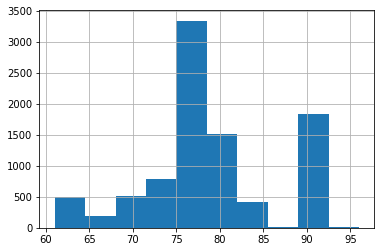

In [17]:
merged_df['similarity_score'].hist()

In [18]:
merged_df.to_csv("ensemble_preds_most_sim_pairs_quran_and_old_testament.csv",index = False)

In [19]:

merged_df.iloc[-5:].t_text

9120    And it shall be, when thou art come in unto the land which the LORD thy God giveth thee for an inheritance, and possessest it, and dwellest therein; \n
9121                      And Moses went into the midst of the cloud, and gat him up into the mount: and Moses was in the mount forty days and forty nights. \n
9122                                                      Forasmuch as there is none like unto thee, O LORD; thou art great, and thy name is great in might. \n
9123                                                           And they came to Jerusalem with psalteries and harps and trumpets unto the house of the LORD. \n
9124                                                                                                  Depart from evil, and do good; and dwell for evermore. \n
Name: t_text, dtype: object

In [20]:
merged_df.iloc[-5:].q_Verse

9120                                                                                                                                                                                   And say: My Lord! Cause me to land at a blessed landing-place, for Thou art Best of all who bring to land.
9121    And when We did appoint for Moses thirty nights (of solitude), and added to them ten, and he completed the whole time appointed by his Lord of forty nights; and Moses said unto his brother, Aaron: Take my place among the people. Do right, and follow not the way of mischief-makers.
9122                                                                                                                                                                                                                                        Blessed be the name of thy Lord, Mighty and glorious!
9123                                                                                                                              